In [2]:
#Use mlenv-tf
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import dataset
fashion_data = keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = fashion_data.load_data()

In [5]:
print("size: x_train", x_train.shape)
print("size: y_train", y_train.shape)
print("size: x_test", x_test.shape)
print("size: y_test", y_test.shape)

size: x_train (60000, 28, 28)
size: y_train (60000,)
size: x_test (10000, 28, 28)
size: y_test (10000,)


In [7]:
#Normalise dataset
x_train = x_train / 255
x_test = x_test / 255

No handles with labels found to put in legend.


This is number: 5


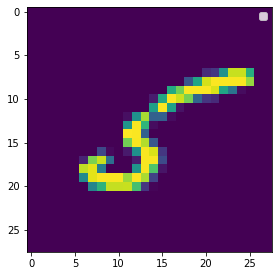

In [13]:
idx = 11
plt.figure(figsize=(7.5, 4.5))
plt.imshow(x_train[idx])
print("This is number:", y_train[idx])
plt.legend()
plt.show()

In [14]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

[]


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import initializers

In [28]:
# Create model
def create_model():
    model = Sequential() # naredimo model/ NN
    model.add(Flatten(input_shape=(28,28)))
    # prva skrita plast: 400 nevronov, 400 izhodnih nevronov, normalna porazdelitev uteži
    model.add(Dense(units=28*28, 
                    activation='relu', 
                    input_shape=(28*28,), 
                    kernel_initializer=initializers.RandomNormal(stddev=0.01)))

    #dodamo še ostale skrite plasti
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))

    #Zadnja plast je izhodna . ker iščemo skalar, vsebuje samo en nevron
    model.add(Dense(10, activation='softmax'))
    return model

In [31]:
#zgradimo nevronsko mrežo
# pri tem določimo vrsto otimizatorja, funkcijo izgube ter potencialne ostale mere uspešnosti
mymodel = create_model()
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# za trening nevronski mreži podamo vhodne in izhodne podatke
# določilo število epoh in velikost batchev
# za razdelitev na učni in validacijski set lahko uporabimo validation_split
#lahko tudi sami specificiramo validacijski set z validation_data
# shuffle: če zmeša trening podatke pred opoho
history = mymodel.fit(x_train, y_train, epochs=50, batch_size=300, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/50
160/160 - 2s - loss: 1.1317 - accuracy: 0.6318 - val_loss: 0.6425 - val_accuracy: 0.8921
Epoch 2/50
160/160 - 2s - loss: 0.5216 - accuracy: 0.9162 - val_loss: 0.4410 - val_accuracy: 0.9304
Epoch 3/50
160/160 - 2s - loss: 0.3685 - accuracy: 0.9467 - val_loss: 0.3467 - val_accuracy: 0.9508
Epoch 4/50
160/160 - 2s - loss: 0.2562 - accuracy: 0.9604 - val_loss: 0.1851 - val_accuracy: 0.9587
Epoch 5/50
160/160 - 2s - loss: 0.1181 - accuracy: 0.9703 - val_loss: 0.1578 - val_accuracy: 0.9643
Epoch 6/50
160/160 - 2s - loss: 0.0831 - accuracy: 0.9783 - val_loss: 0.1473 - val_accuracy: 0.9652
Epoch 7/50
160/160 - 2s - loss: 0.0630 - accuracy: 0.9831 - val_loss: 0.1443 - val_accuracy: 0.9672
Epoch 8/50
160/160 - 2s - loss: 0.0452 - accuracy: 0.9881 - val_loss: 0.1488 - val_accuracy: 0.9663
Epoch 9/50


In [23]:
#history.history.keys()
# Compute moving average
def moving_average(a, n=3) :
    idx = np.cumsum(np.arange(len(a)),dtype=float)
    idx[n:] = idx[n:] - idx[:-n]
    res = np.cumsum(a, dtype=float)
    res[n:] = res[n:] - res[:-n]
    return idx[n - 1:] / n, res[n - 1:] / n

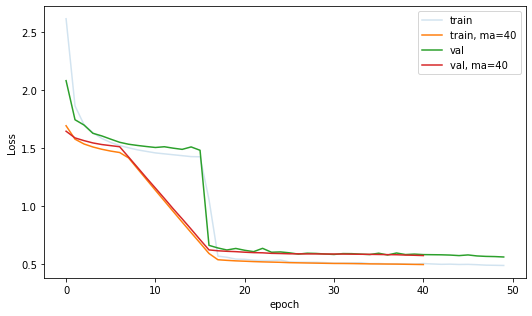

In [27]:
plt.figure(figsize=(7.5, 4.5))
plt.plot(history.history['loss'], label='train',alpha=0.2)
plt.plot(moving_average(history.history['loss'], 10)[1], label='train, ma=40')
plt.plot(history.history['val_loss'], label='val')
plt.plot(moving_average(history.history['val_loss'], 10)[1], label='val, ma=40')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
#plt.ylim([0, 0.005])
#plt.yscale('log')
plt.show()